<a href="https://colab.research.google.com/github/Suryaanugrah2001/conflictIsrael-palestinepythonsum/blob/main/Palestine_Israel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Konflik Israel Palestina

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [66]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
from google.colab import files

ds = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/israelpalestine.csv")
ds = pd.DataFrame(ds)
ds


,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,NaN,51,8
1,2000,NOVEMBER,3838,NaN,112,22
2,2000,OCTOBER,5984,NaN,104,10
3,2000,SEPTEMBER,NaN,NaN,16,1
4,2001,DECEMBER,304,NaN,67,36
...,...,...,...,...,...,...
244,2021,JANUARY,NaN,NaN,4,0
245,2021,FEBRUARY,NaN,NaN,1,0
246,2021,MARCH,NaN,NaN,4,0
247,2021,APRIL,NaN,NaN,1,0


In [68]:
ds.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
244,2021,JANUARY,NaN,NaN,4,0
245,2021,FEBRUARY,NaN,NaN,1,0
246,2021,MARCH,NaN,NaN,4,0
247,2021,APRIL,NaN,NaN,1,0
248,2021,MAY,NaN,NaN,26,3


In [69]:
ds.shape

(249, 6)

In [70]:
ds.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [71]:
ds.isnull().sum()

Year                       0
Month                      0
Palestinians Injuries     54
Israelis Injuries        117
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [72]:
ds.info

<bound method DataFrame.info of      Year      Month Palestinians Injuries Israelis Injuries  \
0    2000   DECEMBER                   781               NaN   
1    2000   NOVEMBER                  3838               NaN   
2    2000    OCTOBER                  5984               NaN   
3    2000  SEPTEMBER                   NaN               NaN   
4    2001   DECEMBER                   304               NaN   
..    ...        ...                   ...               ...   
244  2021    JANUARY                   NaN               NaN   
245  2021   FEBRUARY                   NaN               NaN   
246  2021      MARCH                   NaN               NaN   
247  2021      APRIL                   NaN               NaN   
248  2021        MAY                   NaN               NaN   

     Palestinians Killed  Israelis Killed  
0                     51                8  
1                    112               22  
2                    104               10  
3                     1

In [73]:
ds = ds.fillna({
    'Palestinians Injuries': '0',
    'Israelis Injuries': '0'
})

In [74]:
numerical_columns = ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']
ds[numerical_columns] = ds[numerical_columns].replace({',': ''}, regex=True)
ds[numerical_columns] = ds[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [75]:
ds

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781.0,0.0,51,8
1,2000,NOVEMBER,3838.0,0.0,112,22
2,2000,OCTOBER,5984.0,0.0,104,10
3,2000,SEPTEMBER,0.0,0.0,16,1
4,2001,DECEMBER,304.0,0.0,67,36
...,...,...,...,...,...,...
244,2021,JANUARY,0.0,0.0,4,0
245,2021,FEBRUARY,0.0,0.0,1,0
246,2021,MARCH,0.0,0.0,4,0
247,2021,APRIL,0.0,0.0,1,0


In [76]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  247 non-null    float64
 3   Israelis Injuries      247 non-null    float64
 4   Palestinians Killed    249 non-null    int64  
 5   Israelis Killed        249 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.8+ KB


In [77]:
ds.describe()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,249.000000,247.000000,247.000000,249.000000,249.000000
mean,2010.542169,451.315789,20.890688,40.160643,5.120482
std,6.014702,1471.798713,150.387900,129.148851,11.653323
min,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,61.500000,0.000000,4.000000,0.000000
50%,2011.000000,161.000000,3.000000,12.000000,1.000000
75%,2016.000000,302.500000,15.000000,37.000000,5.000000
max,2021.000000,13735.000000,2347.000000,1590.000000,122.000000


In [78]:
ds.nunique()

Year                      22
Month                     14
Palestinians Injuries    169
Israelis Injuries         53
Palestinians Killed       77
Israelis Killed           33
dtype: int64

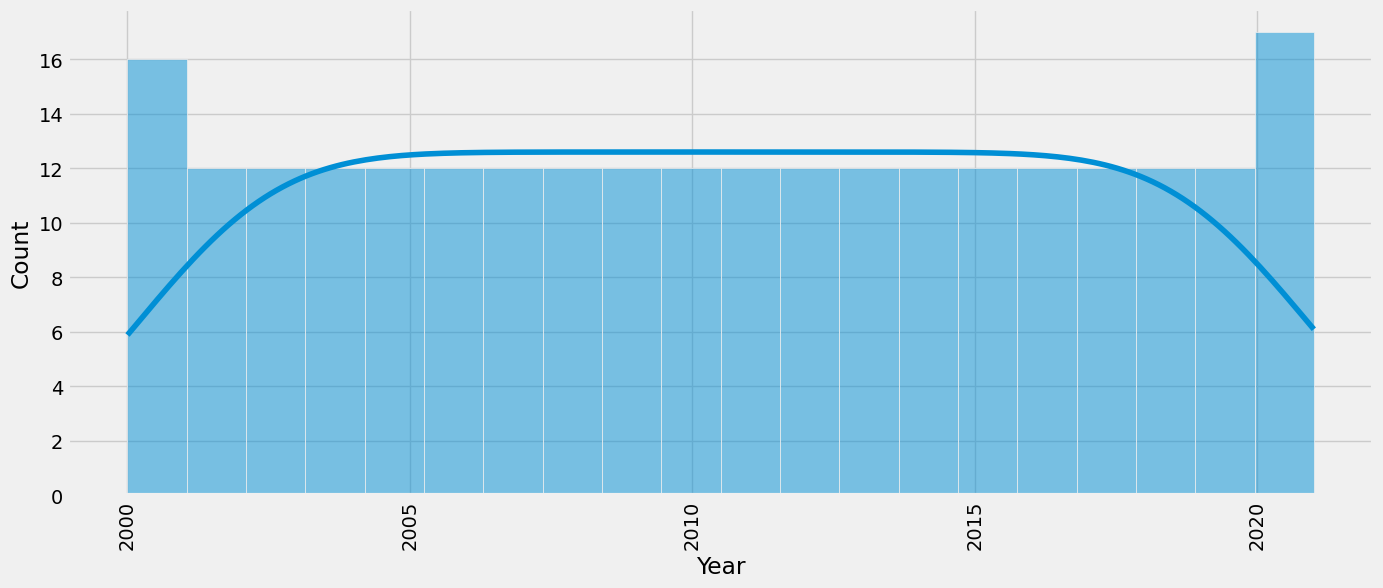

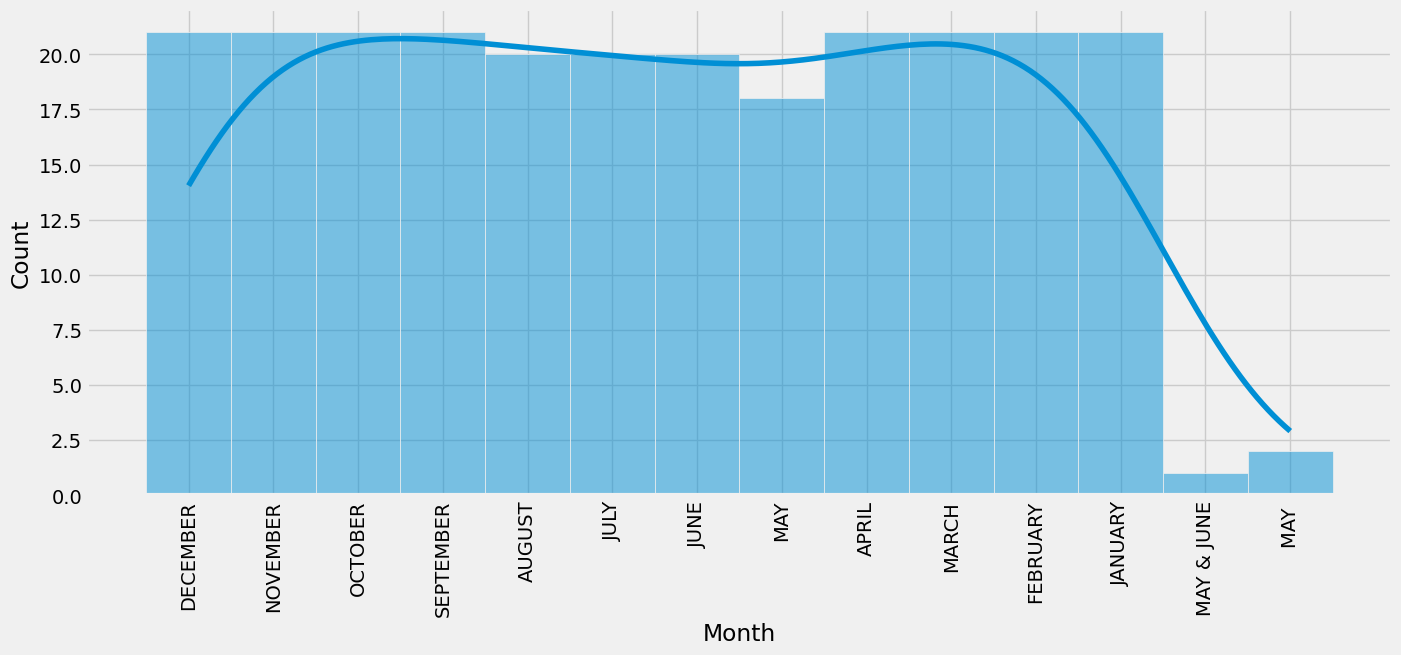

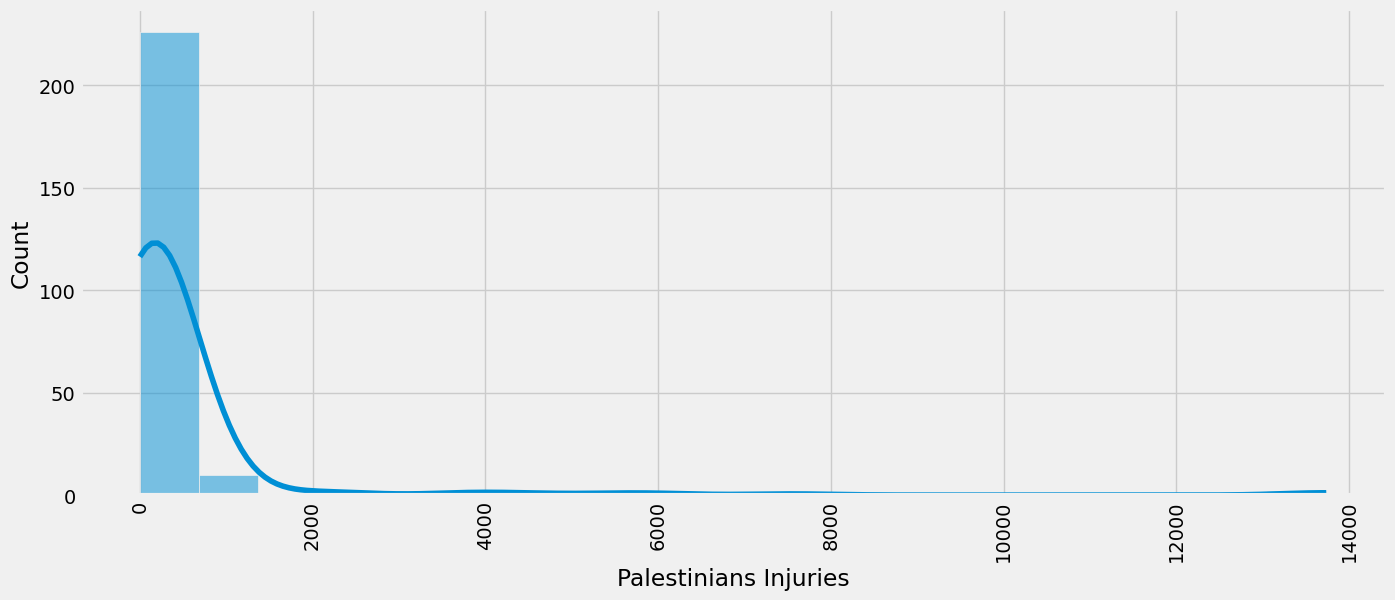

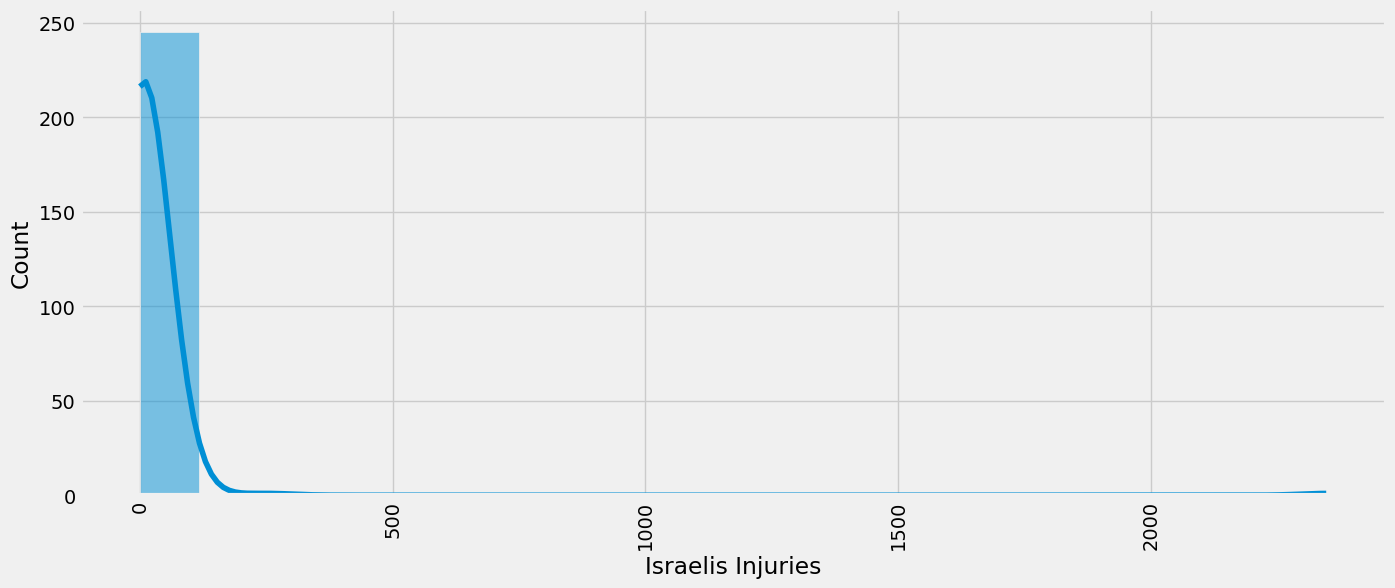

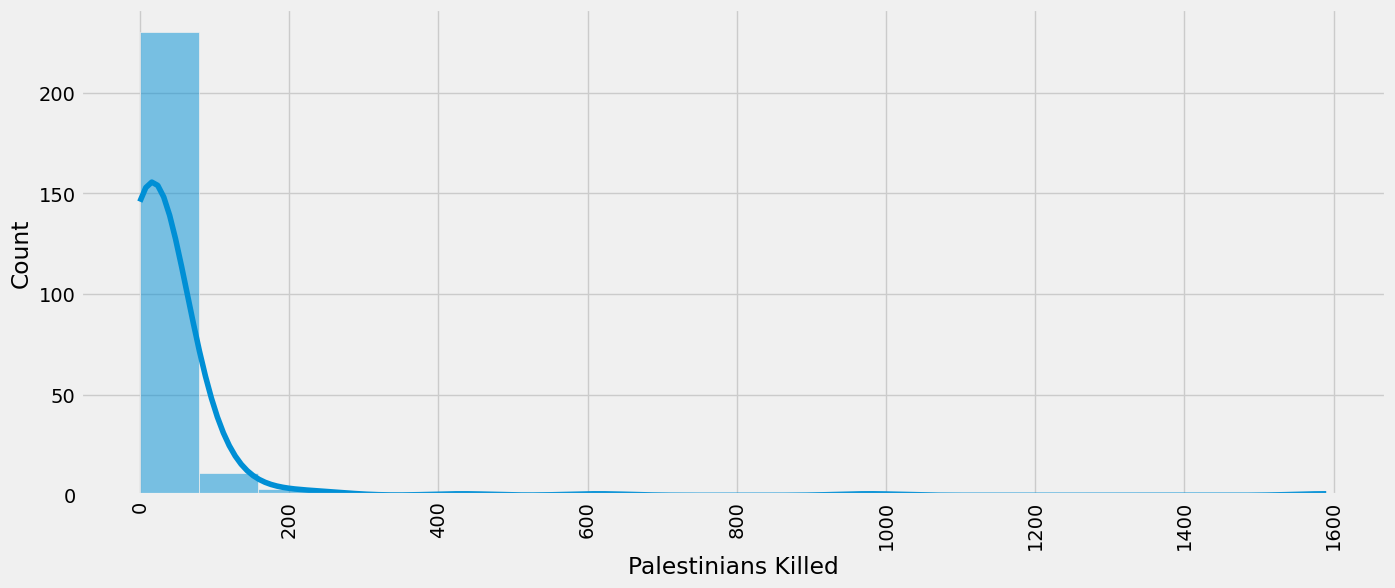

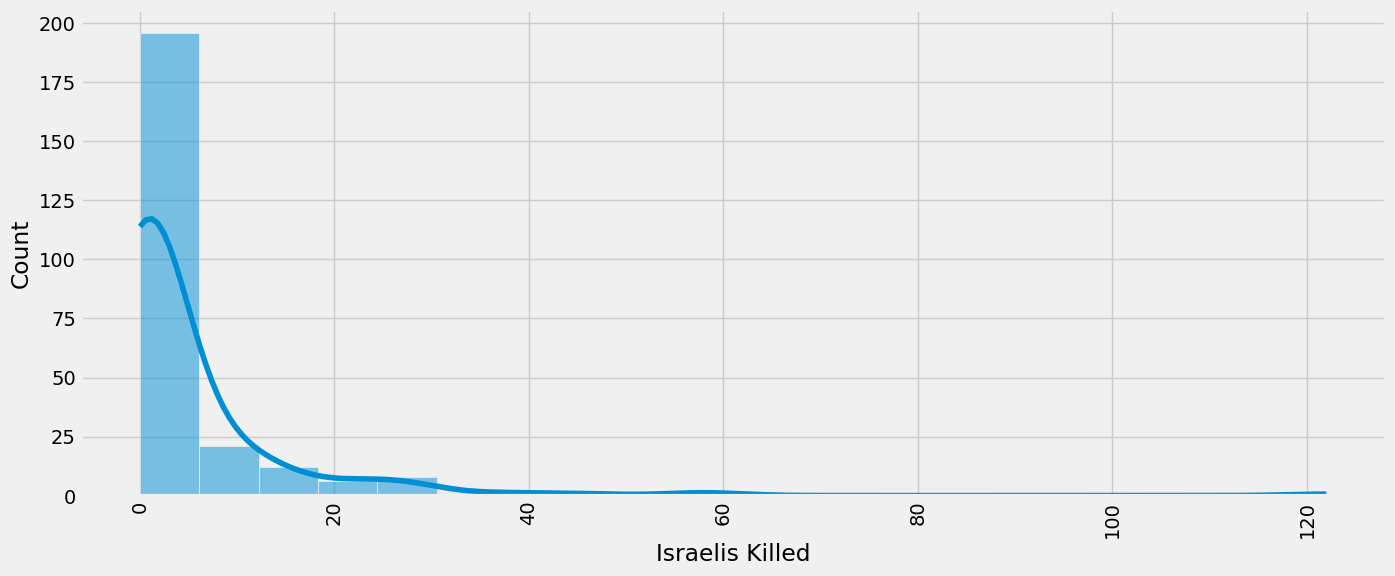

In [79]:
for i in ds.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(ds[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [80]:
ds1 = ds[['Year', 'Palestinians Injuries', 'Israelis Injuries','Palestinians Killed',
          'Israelis Killed']]

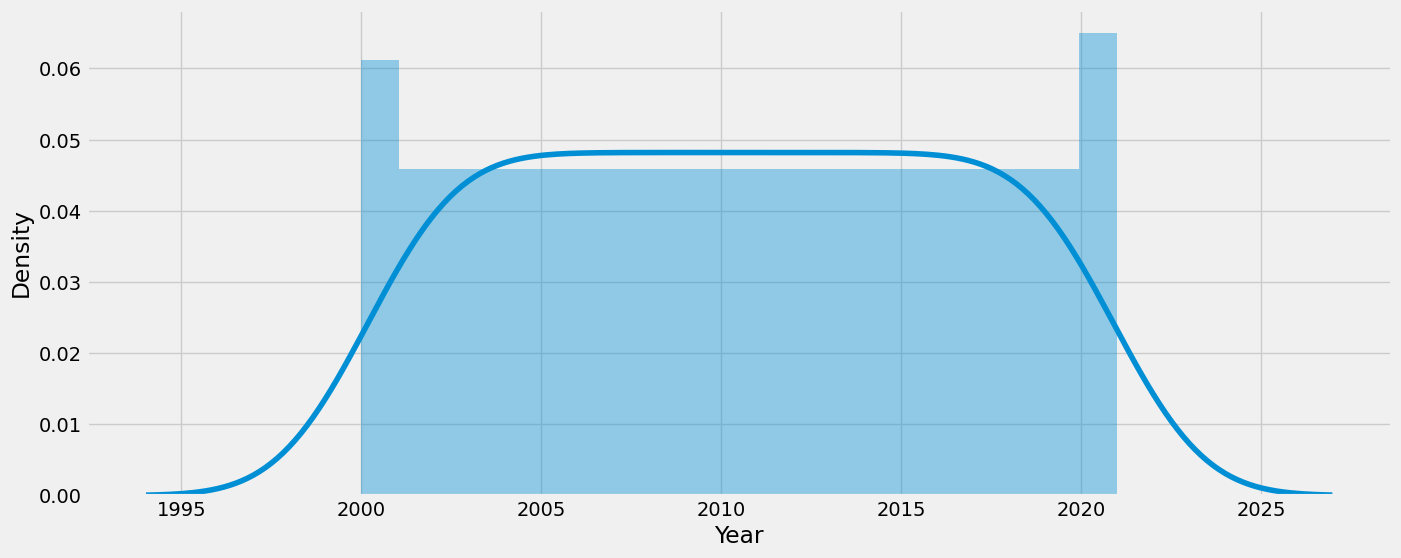

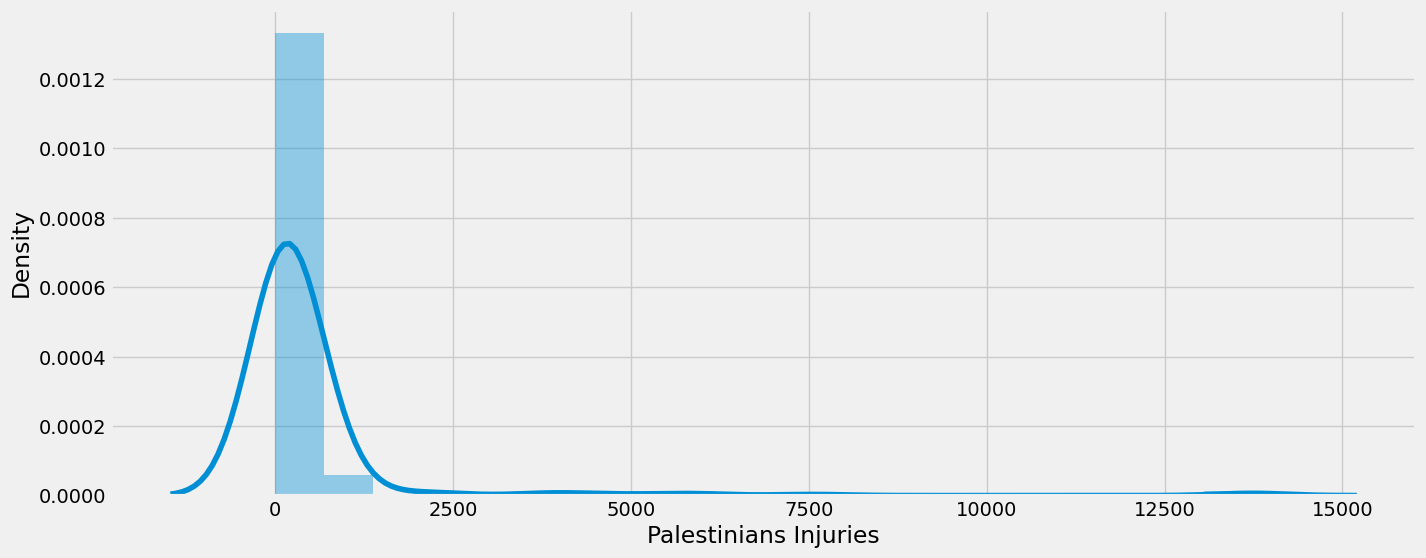

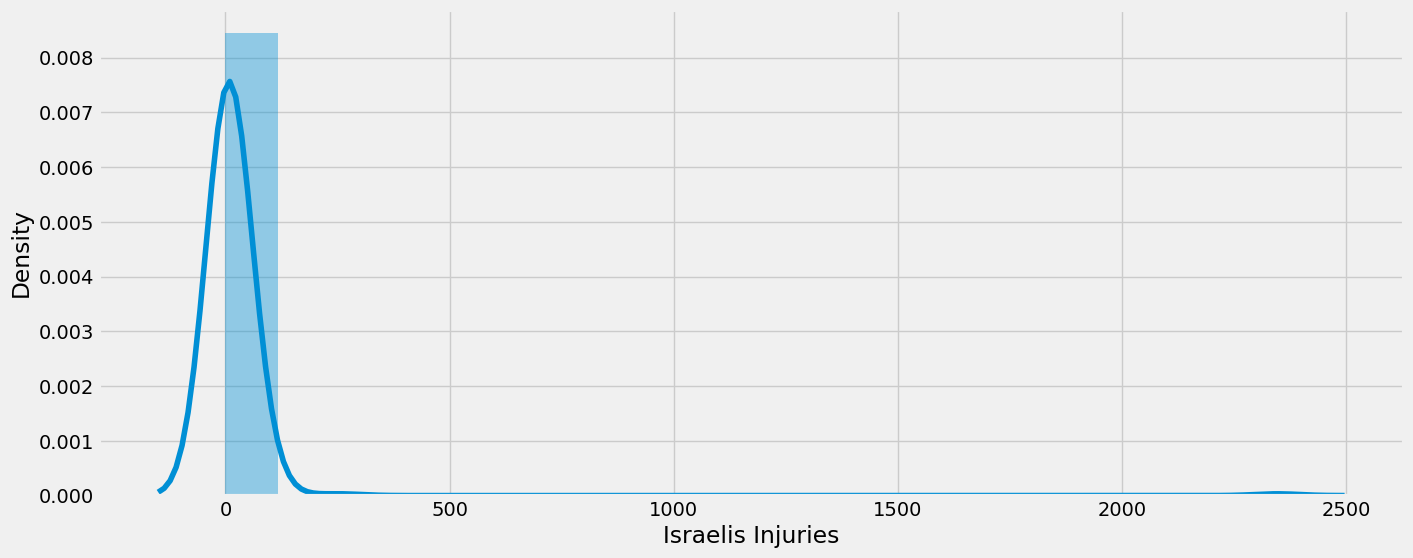

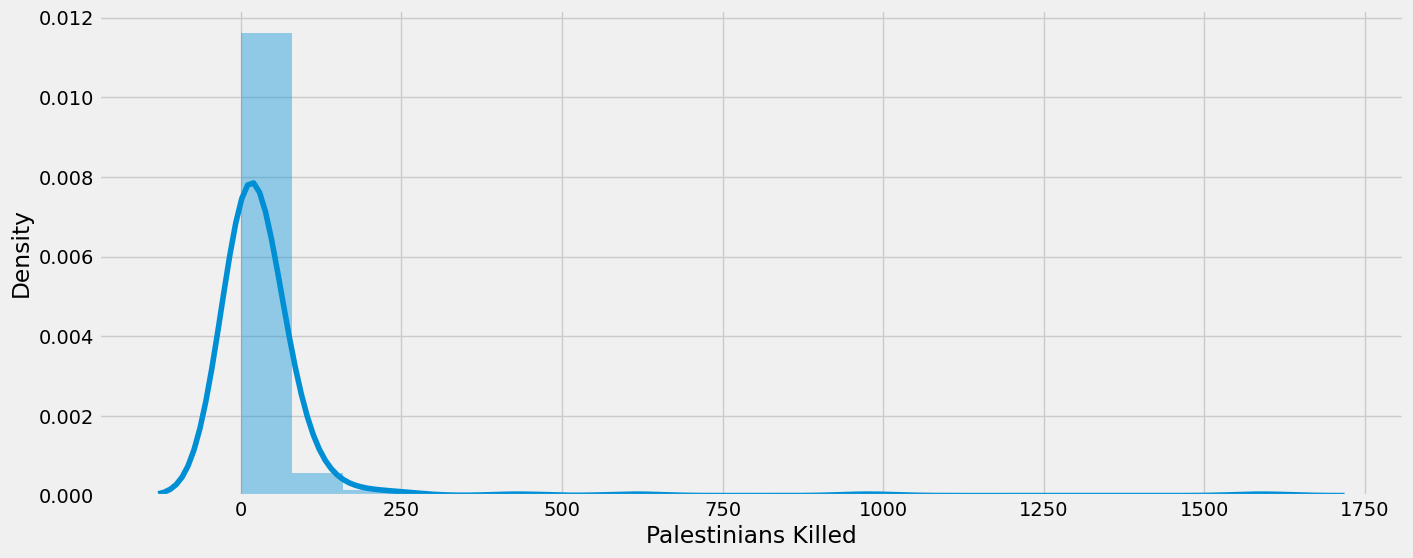

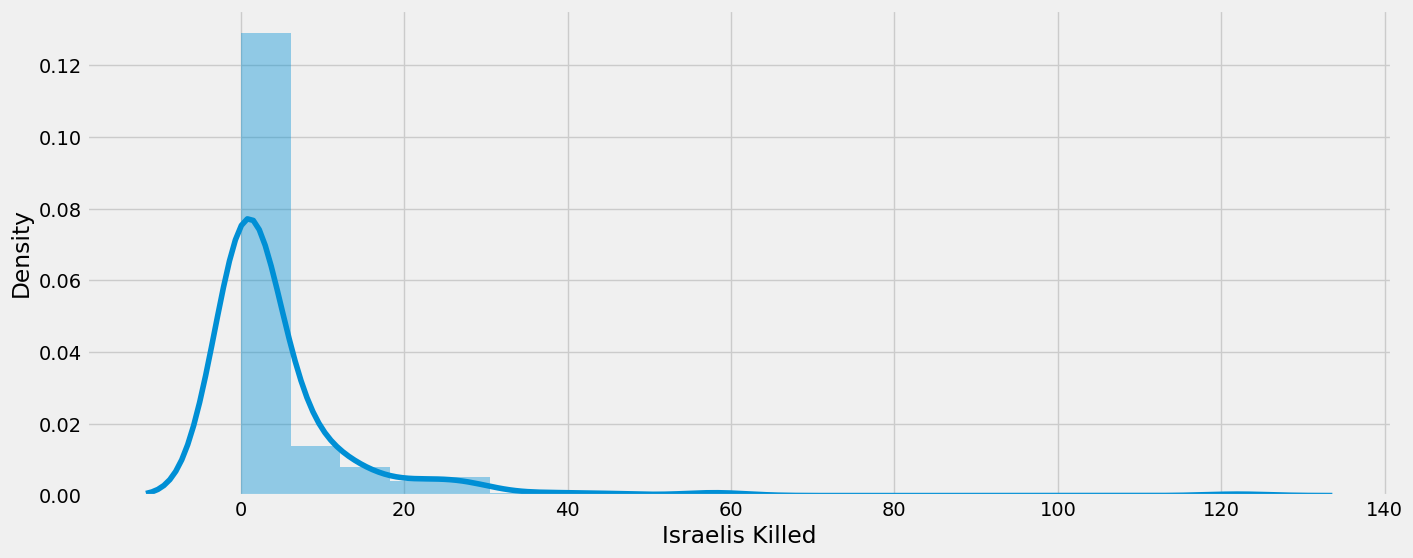

In [81]:
for i in ds1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(ds1[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [87]:
for i in ds.columns:
    fig = go.Figure(data=[go.Histogram(x=ds[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [88]:
for i in ds1.columns:
    fig = go.Figure(data=[go.Box(x=ds1[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [90]:
for i in ds1.columns:
    fig = go.Figure(data=[go.Violin(x=ds1[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [91]:
for i in ds1.columns:
    fig = px.box(ds1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

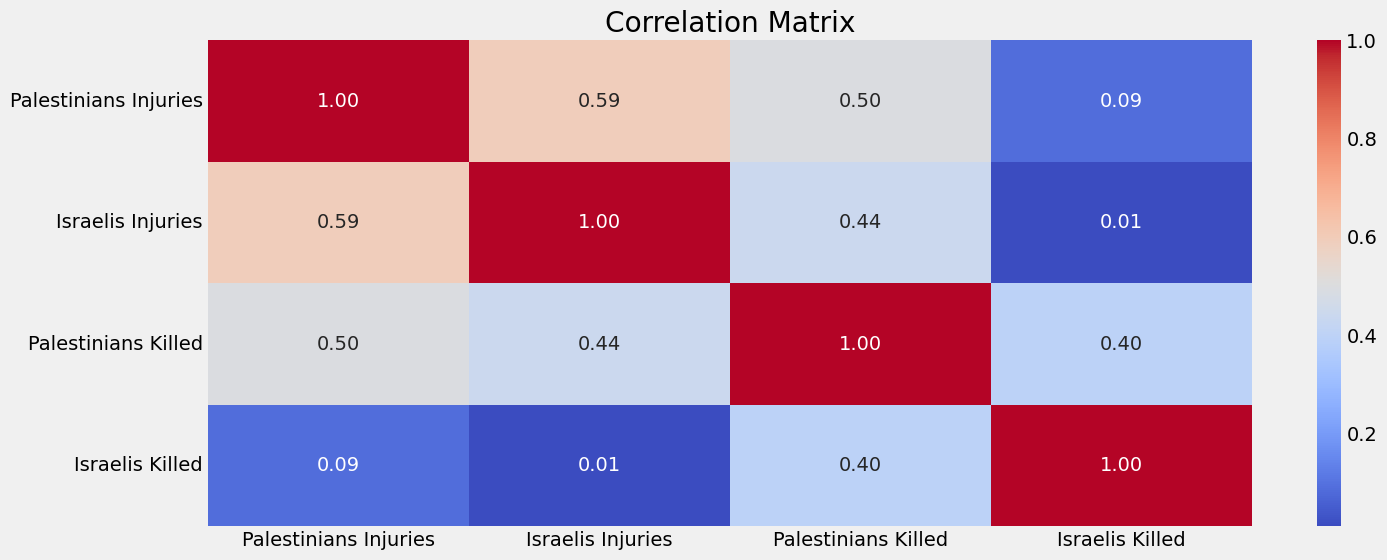

In [94]:
plt.figure(figsize=(15,6))
correlation_matrix = ds[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [95]:
ds['Total Incidents'] = ds['Palestinians Injuries'] + ds['Israelis Injuries'] + ds['Palestinians Killed'] + ds['Israelis Killed']
ds['Palestinian Fatality Rate'] = ds['Palestinians Killed'] / ds['Total Incidents']
ds['Israeli Fatality Rate'] = ds['Israelis Killed'] / ds['Total Incidents']

In [100]:
total_incidents = ds['Total Incidents'].sum()
total_palestinian_incidents = ds['Total Incidents'].sum()
total_israeli_incidents = ds['Total Incidents'].sum()
palestinian_proportion = total_palestinian_incidents / total_incidents
israeli_proportion = total_israeli_incidents / total_incidents

In [101]:
ds

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Total Incidents,Palestinian Fatality Rate,Israeli Fatality Rate
0,2000,DECEMBER,781.0,0.0,51,8,840.0,0.060714,0.009524
1,2000,NOVEMBER,3838.0,0.0,112,22,3972.0,0.028197,0.005539
2,2000,OCTOBER,5984.0,0.0,104,10,6098.0,0.017055,0.001640
3,2000,SEPTEMBER,0.0,0.0,16,1,17.0,0.941176,0.058824
4,2001,DECEMBER,304.0,0.0,67,36,407.0,0.164619,0.088452
...,...,...,...,...,...,...,...,...,...
244,2021,JANUARY,0.0,0.0,4,0,4.0,1.000000,0.000000
245,2021,FEBRUARY,0.0,0.0,1,0,1.0,1.000000,0.000000
246,2021,MARCH,0.0,0.0,4,0,4.0,1.000000,0.000000
247,2021,APRIL,0.0,0.0,1,0,1.0,1.000000,0.000000


In [97]:
ds.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed', 'Total Incidents',
       'Palestinian Fatality Rate', 'Israeli Fatality Rate'],
      dtype='object')

In [102]:
ds['Group'] = ds.apply(lambda row: 'Palestinian' if row['Total Incidents'] <= total_palestinian_incidents else 'Israeli', axis=1)

total_incidents_by_group = ds.groupby('Group')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed']].sum()
fatality_rate_by_group = ds.groupby('Group')[['Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()

In [103]:
total_incidents_by_group

,Total Incidents,Palestinians Killed,Israelis Killed
Group,,,
Israeli,0.0,1596,59
Palestinian,126255.0,8404,1216


In [104]:
fatality_rate_by_group

,Palestinian Fatality Rate,Israeli Fatality Rate
Group,,
Israeli,NaN,NaN
Palestinian,0.262631,0.029522


In [110]:
yearly_trends = ds.groupby('Year')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed', 'Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()
yearly_trends

,Total Incidents,Palestinians Killed,Israelis Killed,Palestinian Fatality Rate,Israeli Fatality Rate
Year,,,,,
2000,2731.750000,70.750000,10.250000,0.261786,0.018881
2001,587.333333,39.166667,16.000000,0.079316,0.034477
2002,486.083333,86.000000,34.916667,0.168572,0.069055
2003,313.750000,49.000000,15.416667,0.153719,0.049717
2004,408.250000,65.500000,8.666667,0.163074,0.023705
2005,176.583333,15.833333,4.250000,0.084600,0.021419
2006,355.083333,55.416667,1.666667,0.143492,0.005107
2007,1345.416667,32.083333,1.000000,0.130732,0.004812
2008,77.083333,73.833333,3.250000,0.845548,0.154452


In [109]:
monthly_summary = ds.groupby('Month')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed', 'Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()
monthly_summary

,Total Incidents,Palestinians Killed,Israelis Killed,Palestinian Fatality Rate,Israeli Fatality Rate
Month,,,,,
APRIL,266.095238,28.809524,4.000000,0.285901,0.011376
AUGUST,1010.550000,49.500000,5.150000,0.200155,0.086265
DECEMBER,1194.952381,45.000000,4.095238,0.234496,0.032523
FEBRUARY,250.333333,20.714286,3.619048,0.276699,0.020387
JANUARY,493.190476,64.857143,4.333333,0.291435,0.022612
JULY,291.526316,99.450000,6.000000,0.233914,0.041279
JUNE,230.100000,19.500000,6.850000,0.254669,0.021041
MARCH,319.571429,34.238095,9.190476,0.273422,0.025384
MAY,335.888889,29.222222,4.944444,0.217345,0.021899


In [112]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ds['Year'], y=ds['Palestinian Fatality Rate'], mode='lines', name='Palestinian Fatality Rate'))
fig.add_trace(go.Scatter(x=ds['Year'], y=ds['Israeli Fatality Rate'], mode='lines', name='Israeli Fatality Rate'))
fig.update_layout(title='Fatality Rates Over Time', xaxis_title='Year', yaxis_title='Fatality Rate')
fig.show()

In [113]:
total_incidents = ds['Total Incidents'].sum()
total_palestinian_incidents = ds[ds['Group'] == 'Palestinian']['Total Incidents'].sum()
total_israeli_incidents = ds[ds['Group'] == 'Israeli']['Total Incidents'].sum()
palestinian_proportion = total_palestinian_incidents / total_incidents
israeli_proportion = total_israeli_incidents / total_incidents

In [116]:
print('Total Incidents:', total_incidents)
print('Total Palestinian Incidents:', total_palestinian_incidents)
print('Total Israeli Incidents:', total_israeli_incidents)
print('Proportion of Palestinian Incidents:', palestinian_proportion)
print('Proportion of Israeli Incidents:', israeli_proportion)

Total Incidents: 126255.0
Total Palestinian Incidents: 126255.0
Total Israeli Incidents: 0.0
Proportion of Palestinian Incidents: 1.0
Proportion of Israeli Incidents: 0.0


Semoga Bermanfaat